In [49]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from skimage.feature import hog, orb
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score

### Helper functions

In [3]:
def imshow(image, title=None):
    plt.axis('off')
    plt.title(title)
    plt.imshow(image, 'gray')
    plt.show()
def showGridImage(images, labels, gsize=5,title=None):
    '''
    Function shows Multiple images.
    params: 
    images--> [Req] array of images flatten to 100*100
    labels --> [Req] array of labels (image class)
    gsize --> [opt, default=5] size for the grid gsize x gsize
    title --> [opt, default=None] title for the grid
    '''
    selected_indices = np.random.choice(len(images), size=gsize*gsize, replace=False)

    # Create a 5x5 grid for subplots
    fig, axes = plt.subplots(gsize,gsize, figsize=(10, 10))
    for i, ax in enumerate(axes.ravel()):
        index = selected_indices[i]
        image = images[index]
        label = labels[index]
        ax.imshow(image.reshape(100,100), 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"Image {classes[label]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

### Loading the data

In [6]:
mainPath = './Image Classification/'
classes = os.listdir(mainPath)
# print(classes)
images = []
labels = []
for cls in classes:
    clsPath = os.path.join(mainPath,cls) # image Classification/Cars/image1.jpg
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        images.append(image.flatten())
        label = classes.index(cls)
        labels.append(label)

### Converting to numpy arrays

In [7]:
import pandas as pd
pd.DataFrame(images)

0     1     2     3     4     5     6     7     8     9     ...  9990  \
0      -1    -1    -1    -1    -1    -1    -1    -1    -1    -1  ...    -1   
1     -73   -71   -70   -70   -66   -64   -61   -57   -55   -54  ...    83   
2      43    65    64    49    48    53    50    36    44    46  ...  -111   
3     -76   -76   -82   -80   -83   -84   -96    65    36    37  ...   113   
4     103    21    15    17    49   112   108   119    78    14  ...  -112   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
982   117   116   115   117   117   117   117   116   116   117  ...    96   
983    97    96    97   100   109   123  -120  -109  -103   -95  ...   -86   
984    -1    -1    -1    -1    -1    -1    -1    -1    -1    -1  ...    -1   
985    -1    -1    -1    -1    -1    -1    -1    -1    -1    -1  ...    -1   
986    -1    -1    -1    -1    -1    -1    -1    -1    -1    -1  ...    -1   

     9991  9992  9993  9994  9995  9996  9997  9998  9999  
0      -1    -1    -1    -1    -1    -1    -1    -1    -1  
1      83    85    85    86    86    84    85    84    83  
2    -107   -98  -100   -94   -98  -110  -105  -103  -107  
3    -128   127   117   114   113   108   114   116   122  
4     121  -120  -123  -105  -108   122  -112  -119  -115  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
982    95    95    94    94    94    93    92    92    91  
983   -90   -93   -97  -101  -103  -104  -106  -106  -108  
984    -1    -1    -1    -1    -1    -1    -1    -1    -1  
985    -1    -1    -1    -1    -1    -1    -1    -1    -1  
986    -1    -1    -1    -1    -1    -1    -1    -1    -1  

[987 rows x 10000 columns]

In [9]:
images = np.array(images)
labels = np.array(labels)

In [10]:
images.shape

(987, 10000)

### showing few random images from dataset

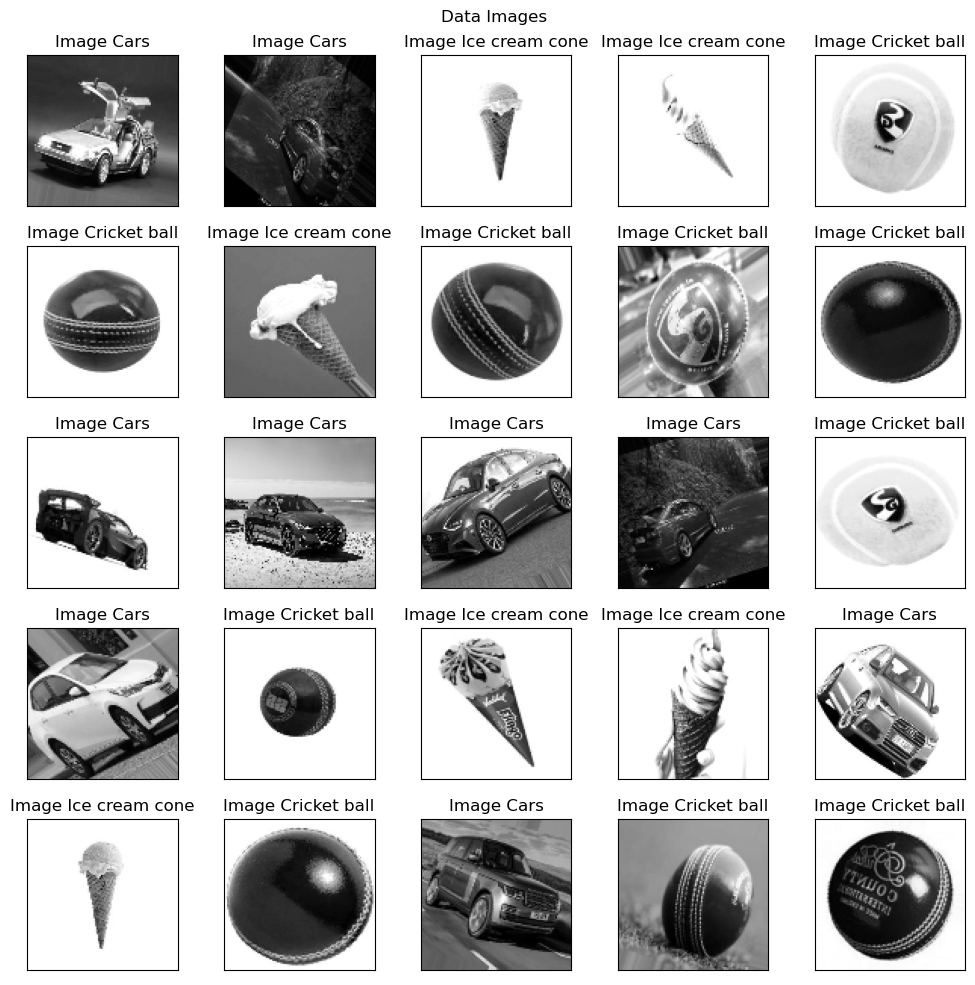

In [11]:
showGridImage(images,labels ,5, 'Data Images')

### splitting the dataset into train and test data
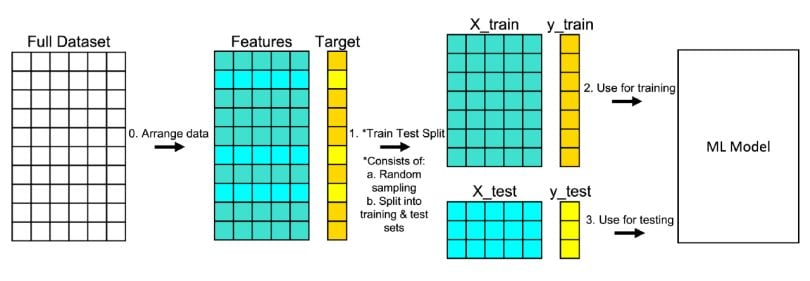

In [12]:
xTrain, xTest, yTrain, yTest = train_test_split(images, labels, test_size=0.2, random_state=0)

### Fitting the ML Model (Logistic Regression)
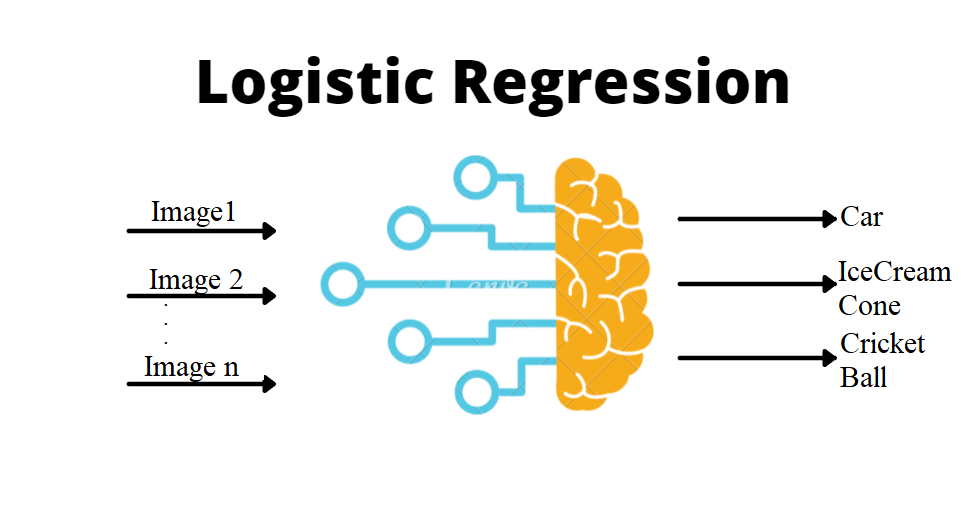

In [13]:
logisticReg = LogisticRegression()
logisticReg.fit(xTrain, yTrain)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction on Test Data

In [16]:
predsClasses = logisticReg.predict(xTest)

### Evaluating the model
    1. Train Accuracy
    2. Test Accuracy

In [18]:
trainAccuracy = logisticReg.score(xTrain, yTrain)
testAccuracy = logisticReg.score(xTest,yTest)
print(f'Training Accuracy: {trainAccuracy*100:.2f}%')
print(f'Test Accuracy: {testAccuracy*100:.2f}%')

Training Accuracy: 100.00%
Test Accuracy: 79.80%


<AxesSubplot:>

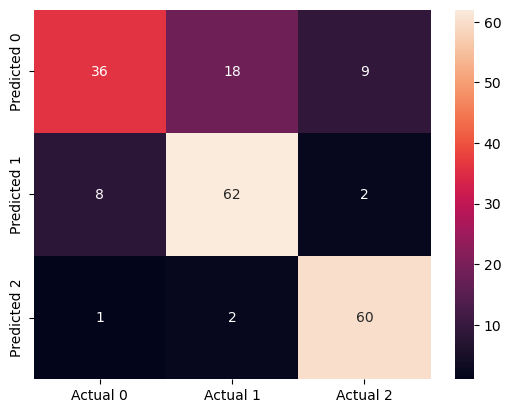

In [19]:
cmLogistic = confusion_matrix(yTest, predsClasses)
sns.heatmap(cmLogistic, annot=True, xticklabels=['Actual 0', 'Actual 1', 'Actual 2'], 
            yticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'])

### Showing images with model predicted Class 

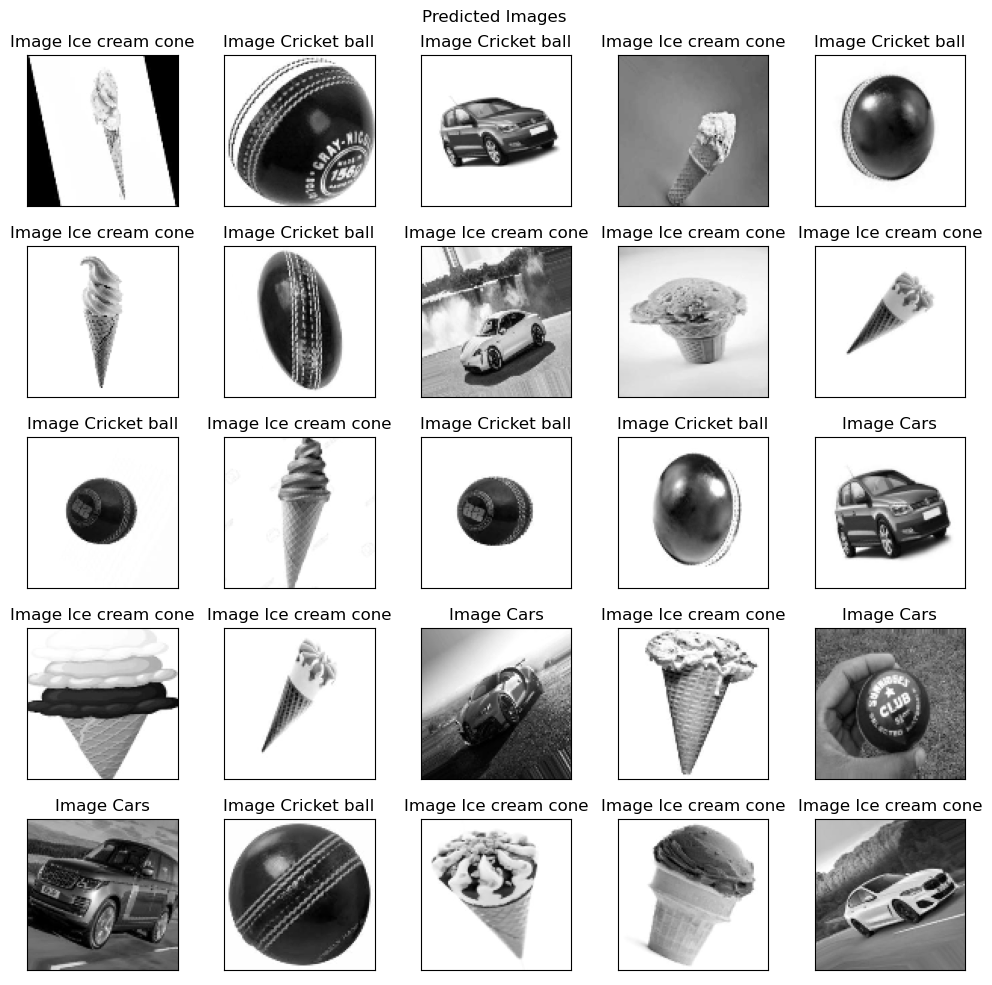

In [20]:
showGridImage(xTest, predsClasses, 5, 'Predicted Images')

### Using the hog feature discriptor for feature extraction

### Hog Features Discriptor
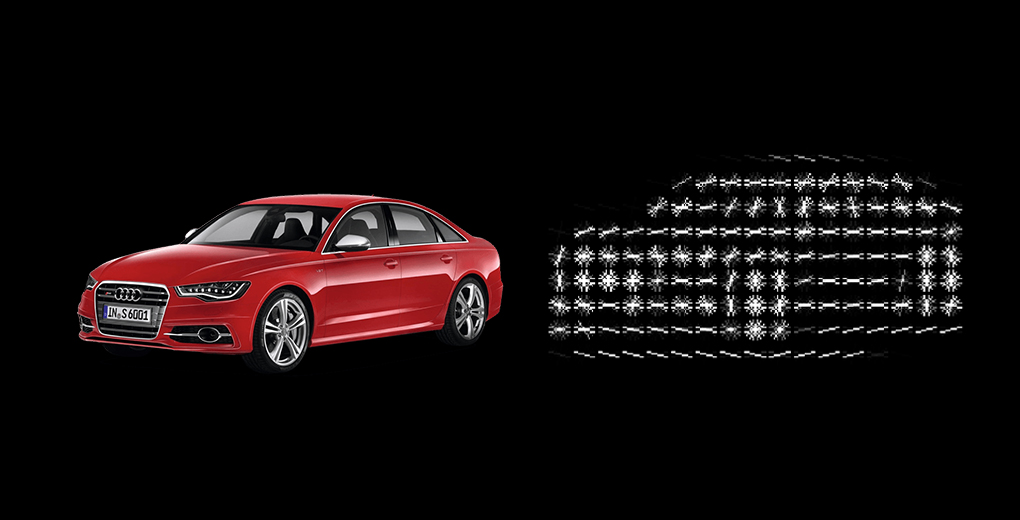
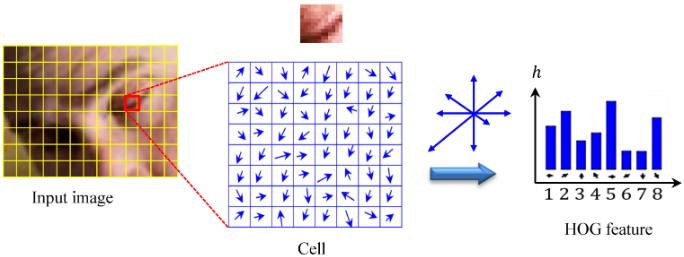

In [22]:
mainPath = './Image Classification/'
classes = os.listdir(mainPath)
hogImages = []
hogFeatures = []
labels = []
for cls in classes:
    clsPath = os.path.join(mainPath,cls)
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        features, hogImage = hog(image, visualize=True)
        hogImages.append(hogImage)
        hogFeatures.append(features)
        label = classes.index(cls)
        labels.append(label)

In [23]:
hogFeatures = np.array(hogFeatures)
labels = np.array(labels)
hogImages = np.array(hogImages)

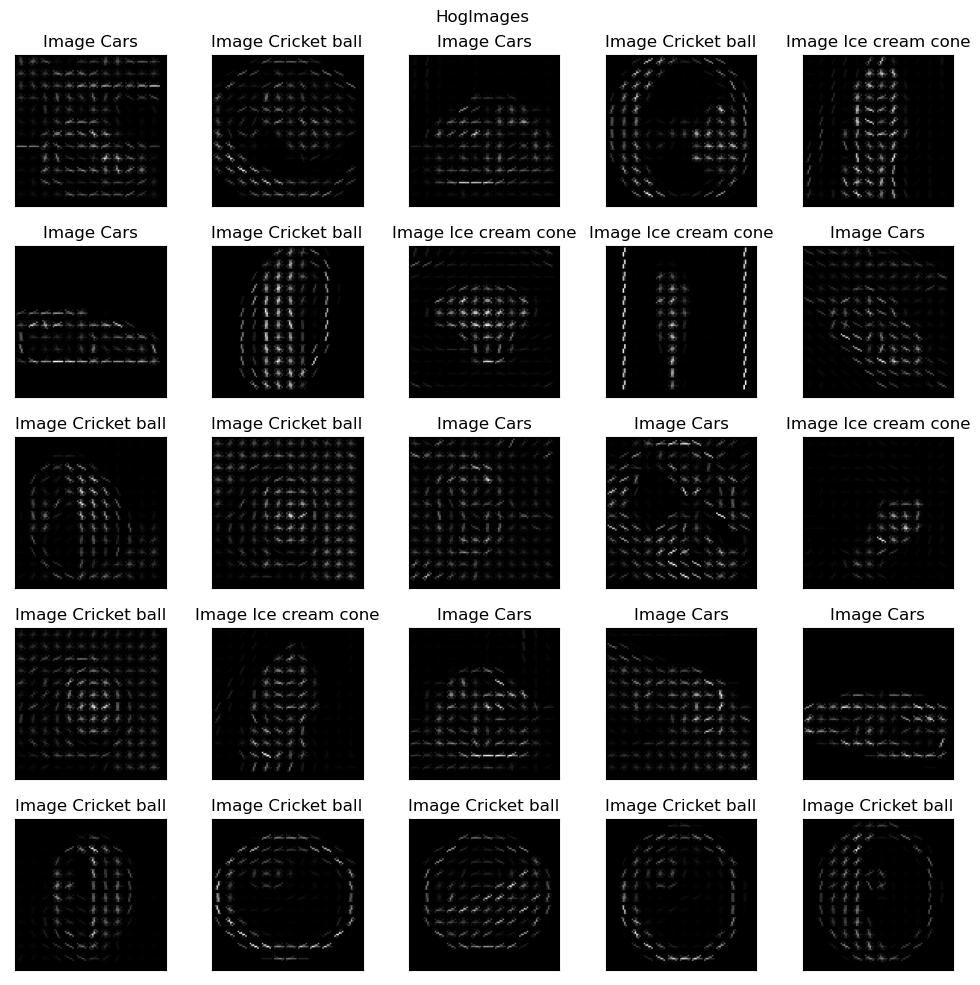

In [24]:
showGridImage(hogImages, labels, title='HogImages')

In [25]:
xTrain, xTest, yTrain, yTest = train_test_split(hogFeatures, labels, test_size=0.2, random_state=42)
hogTrainImages, HogTestImages, hogTrainLabels, hogTestLabels = train_test_split(hogImages, labels, test_size=0.2, random_state=42)

In [26]:
logisticReg = LogisticRegression()
logisticReg.fit(xTrain, yTrain)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
predsClasses = logisticReg.predict(xTest)

In [28]:
trainAccuracy = logisticReg.score(xTrain, yTrain)
testAccuracy = logisticReg.score(xTest,yTest)
print(f'Training Accuracy: {trainAccuracy*100:.2f}%')
print(f'Test Accuracy: {testAccuracy*100:.2f}%')

Training Accuracy: 100.00%
Test Accuracy: 96.97%


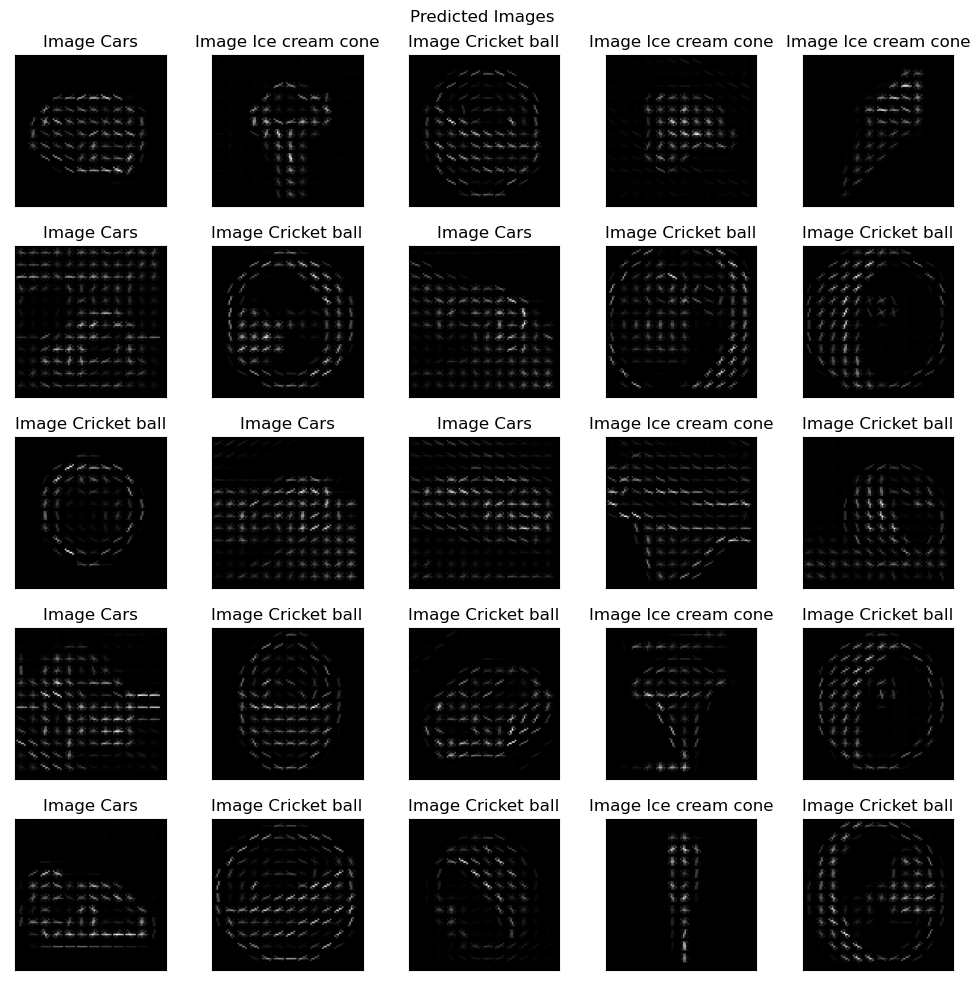

In [29]:
showGridImage(HogTestImages, predsClasses, 5,'Predicted Images')

<AxesSubplot:>

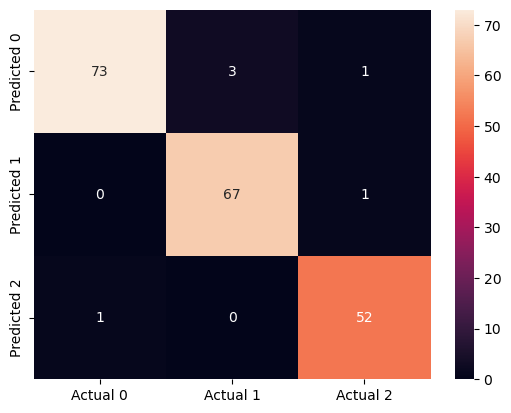

In [30]:
cm = confusion_matrix(yTest, predsClasses)
cmLogistic = confusion_matrix(yTest, predsClasses)
sns.heatmap(cm, annot=True, xticklabels=['Actual 0', 'Actual 1', 'Actual 2'], 
            yticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'])

In [31]:
mainPath = './Image Classification/'
classes = os.listdir(mainPath)
images = []
labels = []
for cls in classes:
    clsPath = os.path.join(mainPath,cls)
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        images.append(image.flatten())
        label = classes.index(cls)
        labels.append(label)

In [34]:
images = np.array(images)
labels = np.array(labels)

In [35]:
xTrain, xTest, yTrain, yTest = train_test_split(images, labels, test_size=0.2, random_state=42)

In [36]:
SVMClassifier = SVC()
SVMClassifier.fit(xTrain, yTrain)

SVC()

In [37]:
predsClasses = SVMClassifier.predict(xTest)

In [38]:
trainAccuracy = SVMClassifier.score(xTrain, yTrain)
testAccuracy = SVMClassifier.score(xTest,yTest)
print(f'Training Accuracy: {trainAccuracy*100:.2f}%')
print(f'Test Accuracy: {testAccuracy*100:.2f}%')

Training Accuracy: 97.34%
Test Accuracy: 92.93%


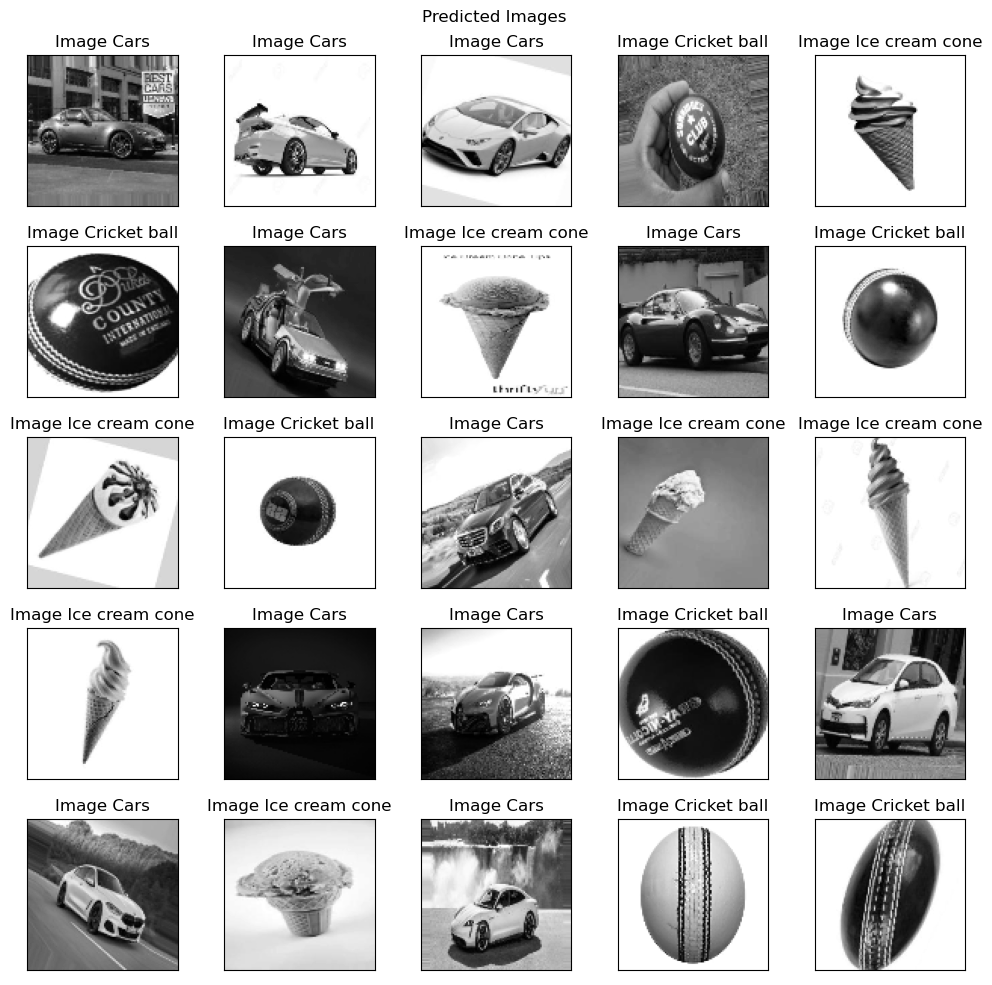

In [39]:
showGridImage(xTest, predsClasses, 5,'Predicted Images')

<AxesSubplot:>

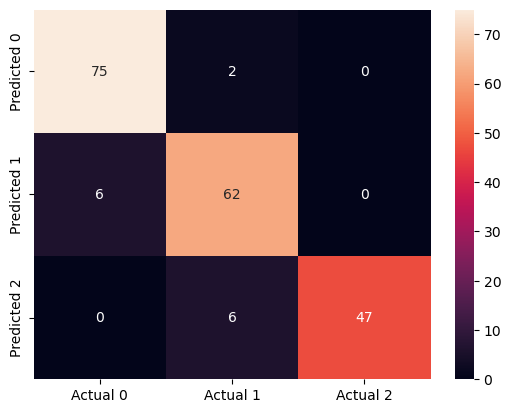

In [40]:
cm = confusion_matrix(yTest, predsClasses)
cmLogistic = confusion_matrix(yTest, predsClasses)
sns.heatmap(cm, annot=True, xticklabels=['Actual 0', 'Actual 1', 'Actual 2'], 
            yticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'])

In [41]:
mainPath = './Image Classification/'
classes = os.listdir(mainPath)
hogImages = []
hogFeatures = []
labels = []
for cls in classes:
    clsPath = os.path.join(mainPath,cls)
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        features, hogImage = hog(image, visualize=True)
        hogImages.append(hogImage)
        hogFeatures.append(features)
        label = classes.index(cls)
        labels.append(label)

In [42]:
images = np.array(images)
labels = np.array(labels)

In [43]:
xTrain, xTest, yTrain, yTest = train_test_split(hogFeatures, labels, test_size=0.2, random_state=42)
hogTrainImages, HogTestImages, hogTrainLabels, hogTestLabels = train_test_split(hogImages, labels, test_size=0.2, random_state=42)

In [44]:
SVMClassifier = SVC()
SVMClassifier.fit(xTrain, yTrain)

SVC()

In [45]:
predsClasses = SVMClassifier.predict(xTest)

In [46]:
trainAccuracy = SVMClassifier.score(xTrain, yTrain)
testAccuracy = SVMClassifier.score(xTest,yTest)
print(f'Training Accuracy: {trainAccuracy*100:.2f}%')
print(f'Test Accuracy: {testAccuracy*100:.2f}%')

Training Accuracy: 99.87%
Test Accuracy: 97.47%


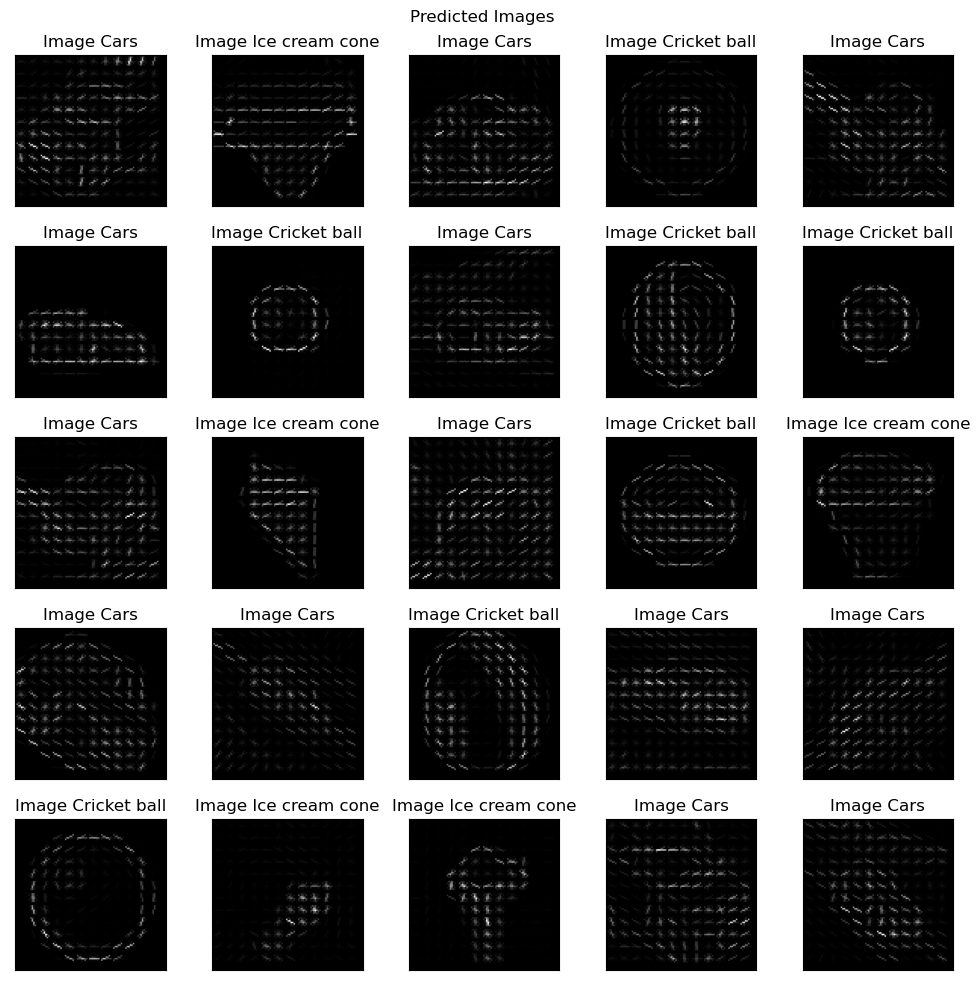

In [47]:
showGridImage(HogTestImages, predsClasses, 5,'Predicted Images')

<AxesSubplot:>

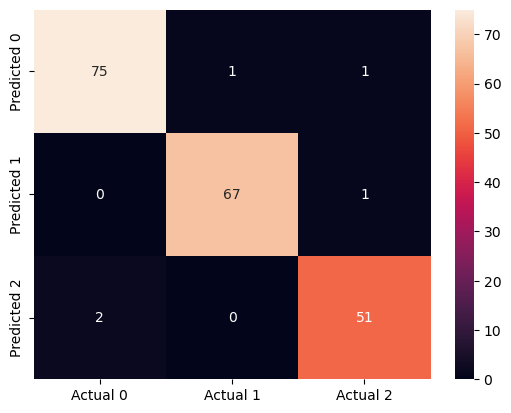

In [48]:
cm = confusion_matrix(yTest, predsClasses)
cmLogistic = confusion_matrix(yTest, predsClasses)
sns.heatmap(cm, annot=True, xticklabels=['Actual 0', 'Actual 1', 'Actual 2'], 
            yticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'])